In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv('/content/drive/My Drive/spectrum.csv', parse_dates=True)
data.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [3]:
data.shape

(3577296, 87)

In [4]:
data.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  

In [6]:
non_num_cols = [col for col in data.columns if data[col].dtype == 'O']
non_num_data = data[non_num_cols]
non_num_data

,Flow.ID,Source.IP,Destination.IP,Timestamp,Label,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,10.200.7.7,26/04/201711:11:17,BENIGN,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,172.19.1.46,26/04/201711:11:17,BENIGN,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,10.200.7.217,26/04/201711:11:17,BENIGN,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,10.200.7.217,26/04/201711:11:17,BENIGN,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,10.200.7.7,26/04/201711:11:17,BENIGN,HTTP_PROXY
...,...,...,...,...,...,...
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,10.200.7.199,15/05/201705:43:40,BENIGN,SSL
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,10.200.7.217,15/05/201705:46:10,BENIGN,SSL
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,10.200.7.218,15/05/201705:45:39,BENIGN,SSL
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,10.200.7.195,15/05/201705:45:59,BENIGN,SSL


In [7]:
[(col, non_num_data[col].nunique()) for col in non_num_cols]

[('Flow.ID', 1522917),
 ('Source.IP', 6566),
 ('Destination.IP', 22824),
 ('Timestamp', 41915),
 ('Label', 1),
 ('ProtocolName', 78)]

In [8]:
def summarize_cat(col_name):
    sorted_values = sorted(non_num_data[col_name].value_counts().iteritems(), key = lambda x:x[1], reverse=True)
    remaining_per = 100
    for (value, count) in sorted_values:
        per = count / len(non_num_data) * 100
        if per >= 1:
            print(f'{value} : {per:.2f}%')
        else :
            print(f'Others : {remaining_per:.2f}%')
            break
        remaining_per = remaining_per - per

In [9]:
for col in non_num_cols:
    print(f"Summary of {col} column : ")
    summarize_cat(col)
    print('\n')

Summary of Flow.ID column : 
Others : 100.00%


Summary of Source.IP column : 
10.200.7.218 : 8.26%
10.200.7.217 : 7.49%
10.200.7.199 : 6.28%
10.200.7.195 : 5.34%
10.200.7.194 : 5.08%
10.200.7.196 : 4.93%
10.200.7.9 : 3.47%
10.200.7.6 : 3.00%
10.200.7.5 : 2.85%
10.200.7.4 : 2.84%
10.200.7.8 : 2.58%
10.200.7.7 : 2.51%
Others : 45.37%


Summary of Destination.IP column : 
10.200.7.8 : 9.03%
10.200.7.7 : 8.81%
10.200.7.9 : 6.25%
10.200.7.5 : 5.46%
10.200.7.6 : 5.34%
10.200.7.4 : 5.16%
10.200.7.218 : 1.08%
10.200.7.217 : 1.05%
Others : 57.83%


Summary of Timestamp column : 
Others : 100.00%


Summary of Label column : 
BENIGN : 100.00%


Summary of ProtocolName column : 
GOOGLE : 26.81%
HTTP : 19.11%
HTTP_PROXY : 17.42%
SSL : 11.32%
HTTP_CONNECT : 8.88%
YOUTUBE : 4.77%
AMAZON : 2.43%
MICROSOFT : 1.53%
GMAIL : 1.13%
Others : 6.60%




In [10]:
num_cols = list(set(data.columns) - set(non_num_cols))
num_cols

['Bwd.Packet.Length.Mean',
 'Active.Mean',
 'RST.Flag.Count',
 'Fwd.Header.Length.1',
 'Fwd.IAT.Total',
 'Flow.IAT.Std',
 'Min.Packet.Length',
 'Flow.IAT.Max',
 'Active.Std',
 'Idle.Max',
 'Init_Win_bytes_forward',
 'FIN.Flag.Count',
 'Fwd.Packets.s',
 'Idle.Std',
 'act_data_pkt_fwd',
 'Flow.Duration',
 'Bwd.IAT.Std',
 'Fwd.URG.Flags',
 'Down.Up.Ratio',
 'Bwd.Packets.s',
 'Total.Fwd.Packets',
 'min_seg_size_forward',
 'Fwd.PSH.Flags',
 'Destination.Port',
 'Packet.Length.Variance',
 'Total.Backward.Packets',
 'Init_Win_bytes_backward',
 'ECE.Flag.Count',
 'Bwd.Avg.Bulk.Rate',
 'Flow.Packets.s',
 'Total.Length.of.Fwd.Packets',
 'Source.Port',
 'Fwd.IAT.Min',
 'Flow.IAT.Min',
 'Fwd.Avg.Bytes.Bulk',
 'Bwd.Packet.Length.Std',
 'CWE.Flag.Count',
 'Fwd.Packet.Length.Max',
 'Fwd.Packet.Length.Mean',
 'Subflow.Bwd.Packets',
 'SYN.Flag.Count',
 'Bwd.IAT.Mean',
 'Fwd.Avg.Packets.Bulk',
 'Bwd.Avg.Bytes.Bulk',
 'Bwd.Header.Length',
 'Average.Packet.Size',
 'Bwd.IAT.Total',
 'Subflow.Fwd.Packets',


In [11]:
data[num_cols].describe()

,Bwd.Packet.Length.Mean,Active.Mean,RST.Flag.Count,Fwd.Header.Length.1,Fwd.IAT.Total,Flow.IAT.Std,Min.Packet.Length,Flow.IAT.Max,Active.Std,Idle.Max,...,Packet.Length.Mean,Fwd.IAT.Max,Fwd.Packet.Length.Std,Fwd.IAT.Std,Subflow.Fwd.Bytes,Active.Min,Flow.Bytes.s,Bwd.Packet.Length.Min,Subflow.Bwd.Bytes,Packet.Length.Std
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,...,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,2.547845e+02,2.981990e+05,6.655865e-04,1.653339e+03,2.418796e+07,3.365395e+06,3.043745e+00,1.285020e+07,1.836406e+05,9.743845e+06,...,1.988191e+02,1.209624e+07,1.520501e+02,3.649620e+06,4.683323e+04,1.676336e+05,4.048709e+06,1.113491e+01,8.445742e+04,3.035190e+02
std,5.060731e+02,2.349390e+06,2.579038e-02,3.008890e+04,3.962563e+07,6.260959e+06,4.145472e+01,2.076518e+07,1.325838e+06,1.888557e+07,...,3.327427e+02,2.049180e+07,2.404702e+02,7.390979e+06,1.816196e+06,2.064219e+06,7.551040e+07,1.055422e+02,2.124319e+06,4.326083e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,7.000000e+00,8.485281e+00,0.000000e+00,5.700000e+02,0.000000e+00,0.000000e+00,...,6.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00,1.882429e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.014286e+01,0.000000e+00,0.000000e+00,1.520000e+02,3.892645e+05,6.836444e+04,0.000000e+00,2.812395e+05,0.000000e+00,0.000000e+00,...,6.283333e+01,2.076290e+05,7.421124e+01,4.717596e+04,4.430000e+02,0.000000e+00,1.140944e+03,0.000000e+00,2.080000e+02,1.069828e+02
75%,2.567500e+02,4.500000e+01,0.000000e+00,3.920000e+02,4.001161e+07,3.980748e+06,6.000000e+00,2.391546e+07,0.000000e+00,8.034389e+06,...,2.500000e+02,1.926976e+07,2.079035e+02,2.932647e+06,1.769000e+03,2.000000e+00,2.343750e+04,0.000000e+00,3.629000e+03,4.818125e+02
max,1.303200e+04,1.146950e+08,1.000000e+00,1.543950e+07,1.200000e+08,8.485273e+07,7.063000e+03,1.200000e+08,7.297136e+07,1.200000e+08,...,1.070867e+04,1.200000e+08,6.225487e+03,8.485256e+07,6.780236e+08,1.146950e+08,1.439600e+10,1.303200e+04,1.345796e+09,9.268781e+03


In [12]:
[col for col in num_cols if data[col].isnull().any()]

[]

In [13]:
cols_for_hist = [col for col in num_cols if data[col].nunique() <= 50]
cols_for_hist, len(cols_for_hist)

(['RST.Flag.Count',
  'FIN.Flag.Count',
  'Fwd.URG.Flags',
  'Down.Up.Ratio',
  'min_seg_size_forward',
  'Fwd.PSH.Flags',
  'ECE.Flag.Count',
  'Bwd.Avg.Bulk.Rate',
  'Fwd.Avg.Bytes.Bulk',
  'CWE.Flag.Count',
  'SYN.Flag.Count',
  'Fwd.Avg.Packets.Bulk',
  'Bwd.Avg.Bytes.Bulk',
  'URG.Flag.Count',
  'Fwd.Avg.Bulk.Rate',
  'ACK.Flag.Count',
  'Bwd.PSH.Flags',
  'Protocol',
  'PSH.Flag.Count',
  'Bwd.URG.Flags',
  'Bwd.Avg.Packets.Bulk'],
 21)

In [14]:
cols_for_desc = [col for col in num_cols if data[col].nunique() > 50]
cols_for_desc

['Bwd.Packet.Length.Mean',
 'Active.Mean',
 'Fwd.Header.Length.1',
 'Fwd.IAT.Total',
 'Flow.IAT.Std',
 'Min.Packet.Length',
 'Flow.IAT.Max',
 'Active.Std',
 'Idle.Max',
 'Init_Win_bytes_forward',
 'Fwd.Packets.s',
 'Idle.Std',
 'act_data_pkt_fwd',
 'Flow.Duration',
 'Bwd.IAT.Std',
 'Bwd.Packets.s',
 'Total.Fwd.Packets',
 'Destination.Port',
 'Packet.Length.Variance',
 'Total.Backward.Packets',
 'Init_Win_bytes_backward',
 'Flow.Packets.s',
 'Total.Length.of.Fwd.Packets',
 'Source.Port',
 'Fwd.IAT.Min',
 'Flow.IAT.Min',
 'Bwd.Packet.Length.Std',
 'Fwd.Packet.Length.Max',
 'Fwd.Packet.Length.Mean',
 'Subflow.Bwd.Packets',
 'Bwd.IAT.Mean',
 'Bwd.Header.Length',
 'Average.Packet.Size',
 'Bwd.IAT.Total',
 'Subflow.Fwd.Packets',
 'Max.Packet.Length',
 'Total.Length.of.Bwd.Packets',
 'Active.Max',
 'Fwd.Header.Length',
 'Bwd.IAT.Max',
 'Flow.IAT.Mean',
 'L7Protocol',
 'Avg.Bwd.Segment.Size',
 'Bwd.IAT.Min',
 'Fwd.Packet.Length.Min',
 'Idle.Mean',
 'Avg.Fwd.Segment.Size',
 'Fwd.IAT.Mean',
 'Bw

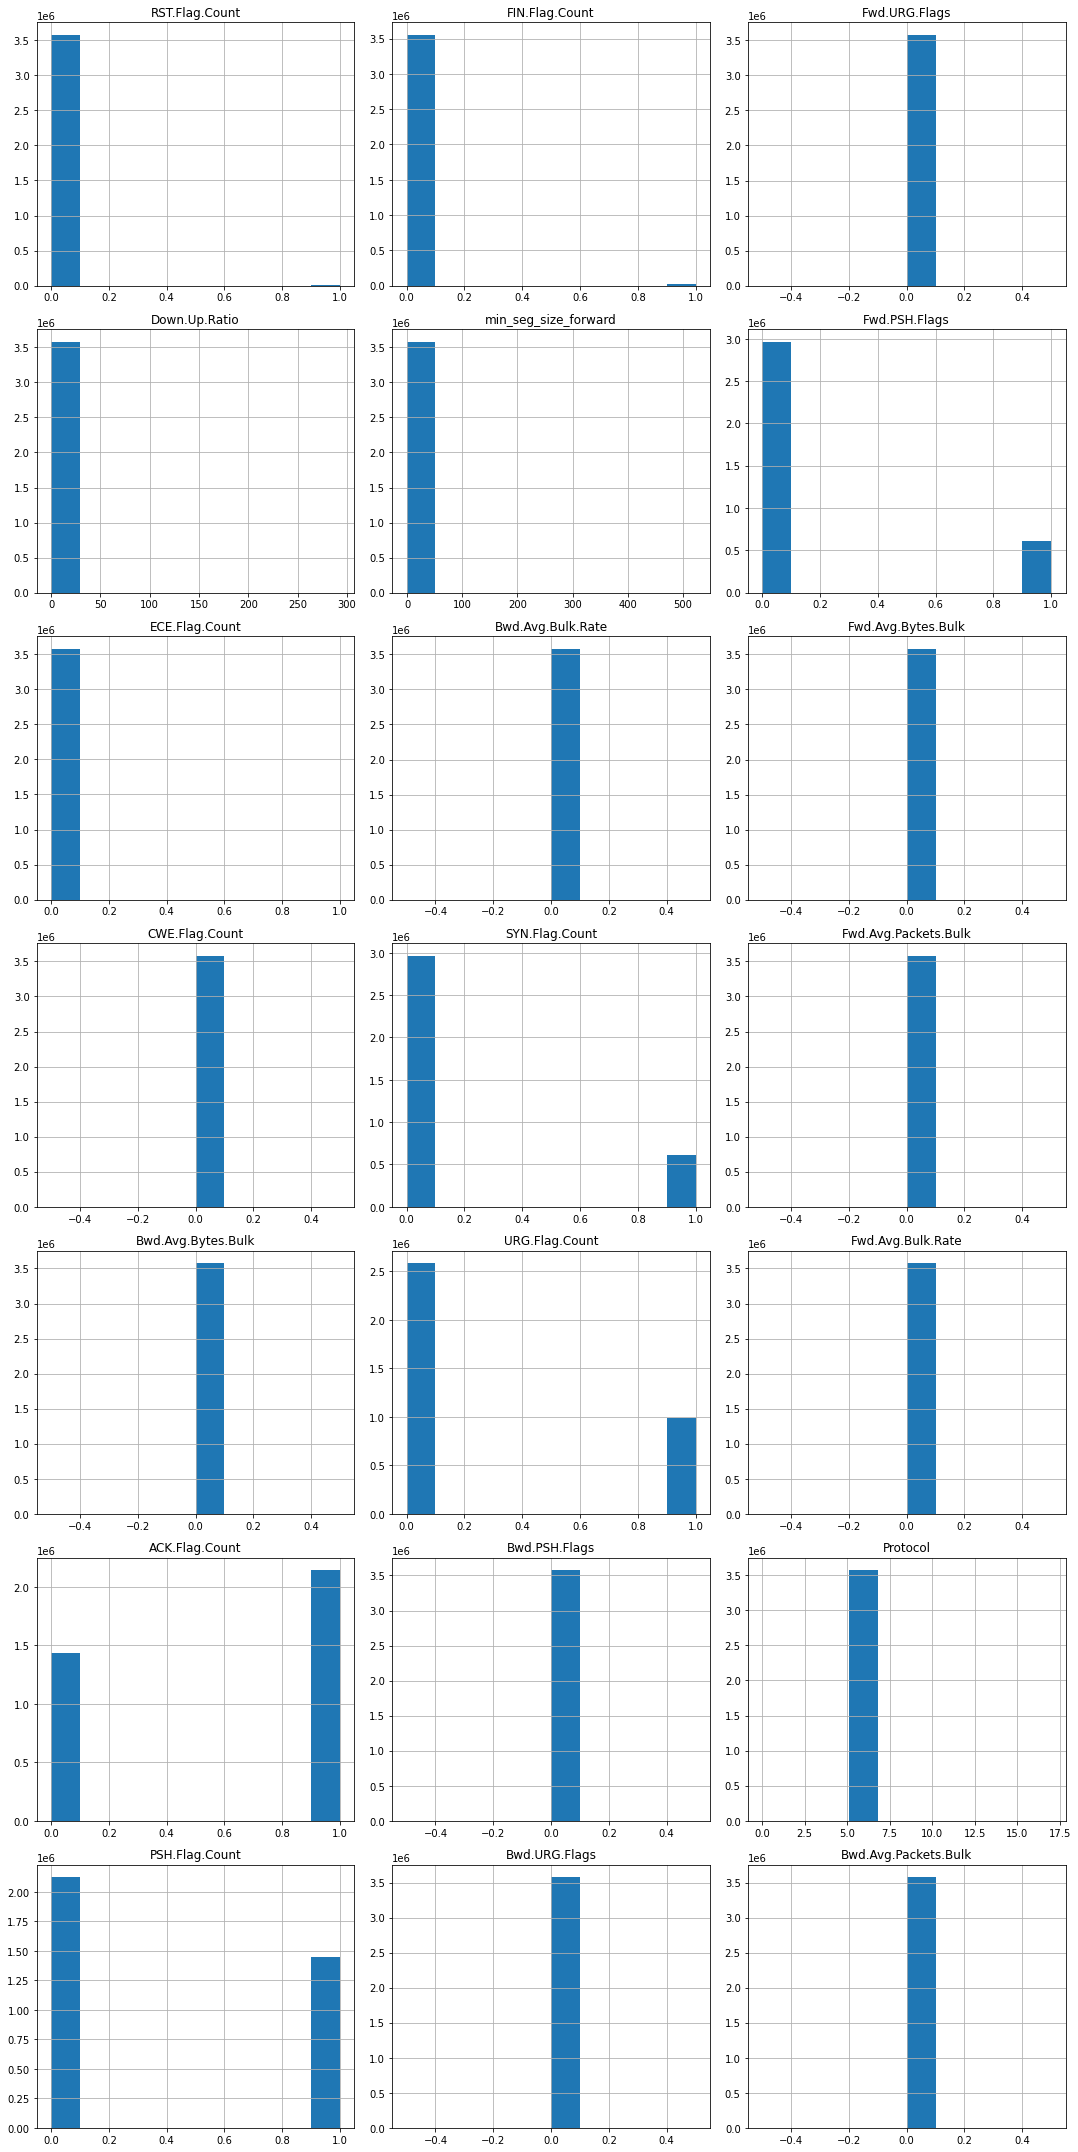

In [15]:
data[cols_for_hist].hist(layout = (7,3), figsize = (15, 30))
plt.tight_layout()

In [16]:
corr = data[num_cols].corr()

In [17]:
ipdata = data.copy()

In [18]:
print("No. of unique values in Timestamp column :",ipdata['Timestamp'].nunique())
print("No. of unique values in FlowID column :",ipdata['Flow.ID'].nunique())

No. of unique values in Timestamp column : 41915
No. of unique values in FlowID column : 1522917


In [19]:
ipdata.drop(['Timestamp', 'Flow.ID'], axis = 1, inplace = True)

In [20]:
single_unique_cols = [col for col in ipdata.columns if ipdata[col].nunique() == 1]
single_unique_cols

['Bwd.PSH.Flags',
 'Fwd.URG.Flags',
 'Bwd.URG.Flags',
 'CWE.Flag.Count',
 'Fwd.Avg.Bytes.Bulk',
 'Fwd.Avg.Packets.Bulk',
 'Fwd.Avg.Bulk.Rate',
 'Bwd.Avg.Bytes.Bulk',
 'Bwd.Avg.Packets.Bulk',
 'Bwd.Avg.Bulk.Rate',
 'Label']

In [21]:
ipdata.drop(single_unique_cols, axis = 1, inplace = True)

In [22]:
ip_add_cols = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port']
ipdata[ip_add_cols]

,Source.IP,Source.Port,Destination.IP,Destination.Port
0,172.19.1.46,52422,10.200.7.7,3128
1,10.200.7.7,3128,172.19.1.46,52422
2,50.31.185.39,80,10.200.7.217,38848
3,50.31.185.39,80,10.200.7.217,38848
4,192.168.72.43,55961,10.200.7.7,3128
...,...,...,...,...
3577291,98.138.79.73,443,10.200.7.199,42135
3577292,98.138.79.73,443,10.200.7.217,51546
3577293,98.138.79.73,443,10.200.7.218,44366
3577294,98.138.79.73,443,10.200.7.195,52341


In [23]:
ipdata.drop(ip_add_cols, axis = 1, inplace = True)

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(ipdata['ProtocolName'])
ipdata['ProtocolName'] = encoder.fit_transform(ipdata['ProtocolName'])
ipdata['ProtocolName']

0          28
1          28
2          25
3          25
4          28
           ..
3577291    58
3577292    58
3577293    58
3577294    58
3577295    58
Name: ProtocolName, Length: 3577296, dtype: int64

In [25]:
ipdata.head(10)

,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,6,45523,22,55,132,110414.0,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,28
1,6,1,2,0,12,0.0,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,28
2,6,1,3,0,674,0.0,337,0,224.666667,194.567041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,25
3,6,217,1,3,0,0.0,0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,25
4,6,78068,5,0,1076,0.0,529,6,215.200000,286.458898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,28
5,6,105069,136,0,313554,0.0,5840,6,2305.544118,1220.822406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,28
6,6,104443,5,0,1076,0.0,529,6,215.200000,286.458898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,28
7,6,11002,3,12,232,3664.0,226,0,77.333333,128.784057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130,26
8,6,108503,10,6,6904,1302.0,1448,0,690.400000,660.894209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91,58
9,6,118415,7,0,2210,0.0,1096,0,315.714286,533.043374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126,22


In [26]:
ipdata.shape

(3577296, 70)

In [27]:
data.dropna(inplace = True) 
test_sample=5.4923
random_state=0.8

In [28]:
def ipInfo(addr=''):
    from urllib.request import urlopen
    from json import load
    if addr == '':
        url = 'https://ipinfo.io/json'
    else:
        url = 'https://ipinfo.io/' + addr + '/json'
    res = urlopen(url)
    #response from url(if res==None then check connection)
    data = load(res)
    #will load the json response into data
    for attr in data.keys():
        #will print the data line by line
        print(attr,' '*13+'\t->\t',data[attr])
data.drop(columns =["Timestamp"], inplace = True) 

In [29]:
data.drop(columns =["Label"], inplace = True) 
df2 = data

In [30]:
df2.drop(columns =["Source.IP", "Source.Port", "Destination.IP", "Destination.Port"], inplace = True) #better way is to replace it with country using some lib like geo2ip but I am lazy
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df2["labels"] = lb_make.fit_transform(df2["ProtocolName"])
#df2[["ProtocolName", "labels"]].head(11)

In [31]:
!pip install '/content/drive/My Drive/lib-0.1.0-py3-none-any.whl'
from sklearn.model_selection import train_test_split
from lib.utils import *
y = df2.iloc[:,-1]

X,y=extract_feature(df2)
ac=[]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train.shape, y_train.shape
ac=[]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./drive/My Drive/lib-0.1.0-py3-none-any.whl
lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [32]:
ac=[]

def cheby1_bandpass_filter(data, lowcut, highcut, fs, order=5, rp=1):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = cheby1(order, rp=rp, Wn=[low, high], btype='bandpass')
    y = filtfilt(b, a, data)
    return y



def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    dn = (np.append(EKG_f[1:], 0) - EKG_f)



    dtn = dn/(np.max(abs(dn)))

    an = abs(dtn)

    en = an**2

    sen = -abs(dtn) * np.log10(abs(dtn))

    sn = -(dtn**2) * np.log10(dtn**2)
    sn_f = np.insert(running_mean(sn, window_len), 0, [0] * (window_len - 1))


    zn = np.imag(hilbert(sn_f))


    ma_len = 1250
    zn_ma = np.insert(running_mean(zn, ma_len), 0, [0] * (ma_len - 1))


    zn_ma_s = zn - zn_ma
    return (cumsum[N:] - cumsum[:-N]) / float(N)
window_len = 79





ac.append(accuracy_score(df2,y_test,sample_weight=0.2)*100)

In [35]:
def run_simulation(genc, det, Np, Ns, fc, fs, Pgen, fcgen):

	np.random.seed()

	N = Np*Ns

	x = genc.get(N, fc, fs, Pgen, fcgen)
	assert len(x) == N

	jl = range(0, N, Ns)
	assert len(jl) == Np

	gammal = np.empty(shape=Np)
	for func, funcname in det:

		for i, j in enumerate(jl):
			x0 = x[j:j+Ns]
			gammal[i] = func(x0)

		path = get_path(genc, func, funcname, Ns, fs, Pgen, fcgen)

		assert not os.path.exists(path), ("Not overwriting %r" % (path,))
		np.savetxt(path, gammal)

ac.append(accuracy_score(df2,y_test,sample_weight=1)*100)

accuracy of EDT is 95.27 and Pilot radio detetions is 93.97


(80.0, 100.0)

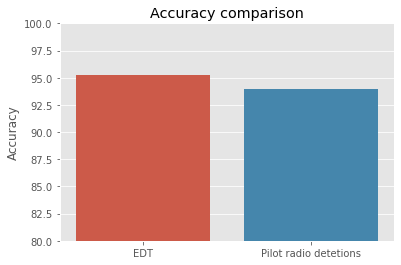

In [36]:
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

x=['EDT','Pilot radio detetions']

ac=ac
print("accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax=sns.barplot(x,ac[:2])
ax.set_title('Accuracy comparison')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
low = min(ac)
high = max(ac)
ax.set_ylim(80,100)